In [419]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt
from scipy import signal

# Filtro FIR

### Functions and signal parameters

In [420]:
def f(x):
    #return np.cos(2*60*np.pi*x) + 2*np.cos(2*600*np.pi*x) # Function
    return 2*np.cos(2*80*np.pi*x) + np.cos(2*180*np.pi*x)

def hdSin(x, wc, M):
    return np.sin(wc*(x-M))/(np.pi*(x-M))

SPoints = 100


Text(0.5, 1.0, 'Function Y')

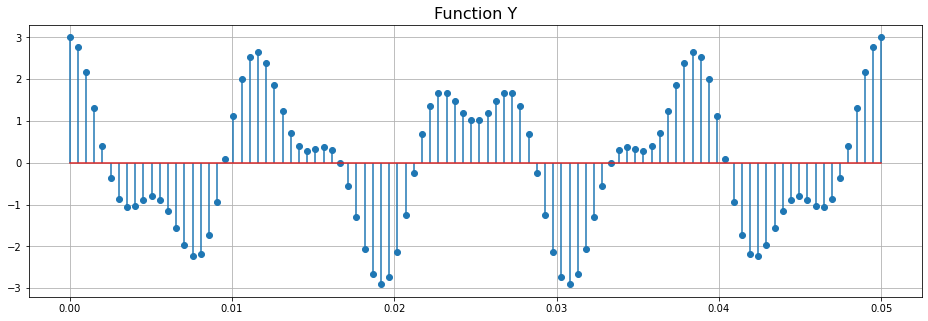

In [421]:
Lims = [0,5e-2]   # Sample limits
Fs = 2000 # Sample frequency

SPoints = int(Fs*(Lims[1] - Lims[0]))    # Sample points
print(f"SPoints = {SPoints}")
Xs = np.linspace(Lims[0],Lims[1],SPoints)
Ys = f(Xs)

plt.figure(figsize=(16,5))
plt.grid(True)
plt.stem(Xs,Ys)
plt.title("Function Y", fontsize=16)

### Window parameters

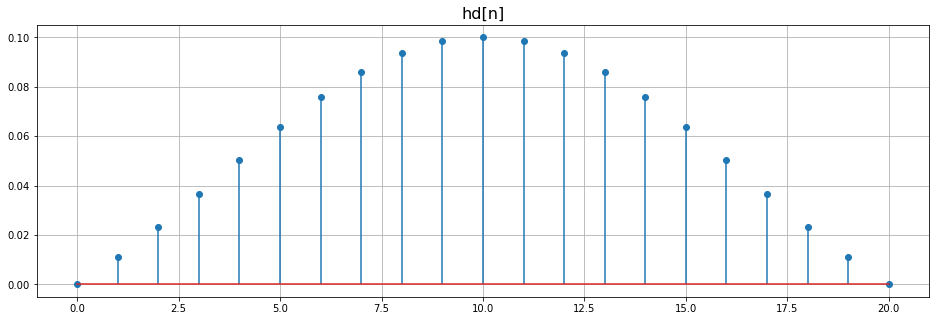

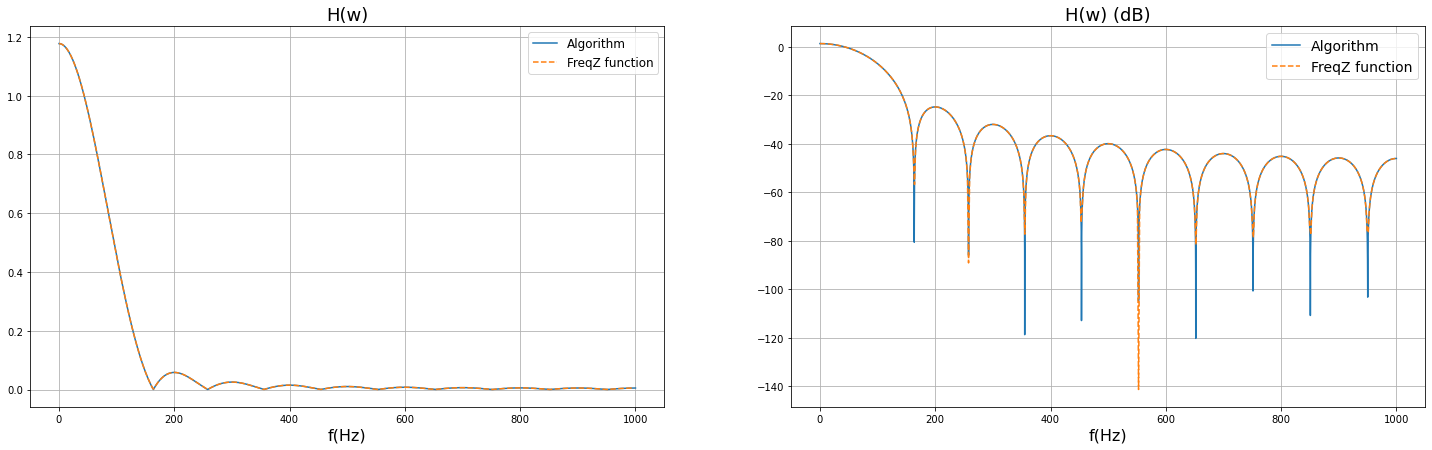

In [425]:
FOrder = 20 # Filter order
CutF = 100 # Cutoff frequency (Hz)

wc = 2*np.pi*CutF/Fs
w = np.ones(FOrder+1)
hd = np.zeros(FOrder+1)

for i in range(FOrder+1): # Window inverse transform
    if(i == FOrder/2):
        hd[i] = wc/np.pi
    else:
        hd[i] = hdSin(i,wc,FOrder/2) 

plt.figure(figsize=(16,5))
plt.grid(True)
plt.stem(np.arange(0,len(hd),1),hd)
plt.title("hd[n]", fontsize=16)

h = np.multiply(w,hd)
FreqPoints = 10000  # Frequency points for calculing H(n)

NormW = np.linspace(0, 0.5*2*np.pi, FreqPoints)
HArray = np.zeros(FreqPoints, dtype=complex)
for j in range(len(NormW)):  # Z Transform loop
    HResp = 0
    for i in range(len(h)):
        HResp = HResp + h[i]*np.exp(-1j*NormW[j]*i)
    HArray[j] = HResp
    
w , H = signal.freqz(hd,fs=Fs) # FreqZ function calculation

figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Fs*NormW/(2*np.pi),np.abs(HArray), label="Algorithm")
ax[0].plot(w,np.abs(H), "--", label="FreqZ function")
ax[0].set_title("H(w)", fontsize=18)
ax[0].set_xlabel("f(Hz)", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(Fs*NormW/(2*np.pi),20*np.log10(np.abs(HArray)), label="Algorithm")
ax[1].plot(w,20*np.log10(np.abs(H)), "--", label="FreqZ function")
ax[1].set_title("H(w) (dB)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=14)

### Output Signal

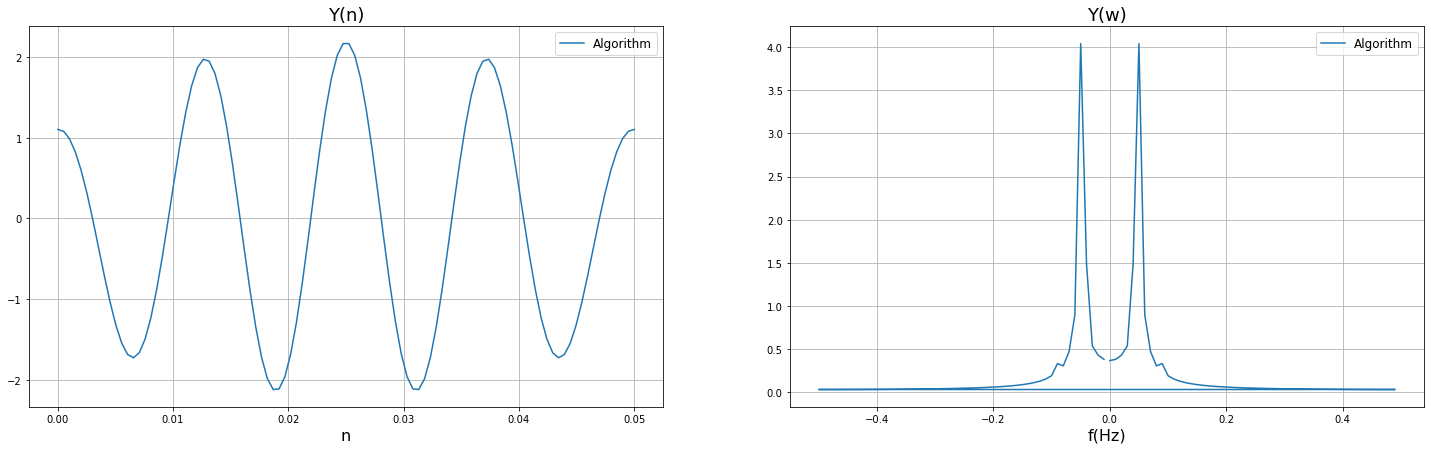

In [423]:
w , H = signal.freqz(hd,fs=Fs) # FreqZ function calculation

con = np.convolve(Ys,hd)
conLen1 = int(len(con)/2 -SPoints/2)
conLen2 = int(len(con)/2 +SPoints/2)
figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Xs,con[conLen1 : conLen2], label="Algorithm")
ax[0].set_title("Y(n)", fontsize=18)
ax[0].set_xlabel("n", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(np.fft.fftfreq(SPoints),np.abs(np.fft.fft(con[0:SPoints])), label="Algorithm")
ax[1].set_title("Y(w)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=12)

# Filtro IIR

In [438]:
wp = 0.2*np.pi # Passband edge
ws = 0.5*np.pi # Stopband edge
AttS = -15 # Stopband attenuation (in dB)
AttP = -2 # Passband attenuation (in dB)

OmegaS = (np.tan(ws/2) / np.tan(wp/2))
N = int( np.ceil((np.log10((10**(np.abs(AttS)/10)-1) / (10**(np.abs(AttP)/10)-1))) / (2*np.log10(OmegaS))) )
print(f'Order(N) = {N}')

sk = np.zeros(N, dtype=complex)
for i in range(N):
    sk[i] = np.exp(1j*np.pi/2 * (2*i+1+N)/N)

FPoints = 500 # Frequency points
FRange = np.linspace(0, 2*10*np.pi, FPoints)
HsArray = np.ones(FPoints, dtype=complex) # H(s) expression
for i in range(FPoints):
    for j in range(N):
        HsArray[i] = HsArray[i] * 1/(np.exp(1j*FRange[i]) - sk[j])

Order(N) = 2
